In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import re
import json
from pandas.io.json import json_normalize
from urllib.request import urlopen
import json
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
# Read data and assign NA to missing values 
crimedata= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                   sep='\s*,\s*',encoding='latin-1',engine='python', na_values=["?"])

crimedata.columns = ['communityname','state','countyCode','communityCode','fold','population','householdsize','racepctblack',
           'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
           'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
           'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap',
           'HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
           'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
           'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
           'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig',
           'PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
           'PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam',
           'PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup',
           'PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
           'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
           'OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc',
           'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState',
           'PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps',
           'LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop',
           'RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor',
           'OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans',
           'PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn',
           'PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
           'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
           'arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']

print(crimedata)

           communityname state  countyCode  communityCode  fold  population  \
0         Marpletownship    PA        45.0        47616.0     1       23123   
1             Tigardcity    OR         NaN            NaN     1       29344   
2       Gloversvillecity    NY        35.0        29443.0     1       16656   
3            Bemidjicity    MN         7.0         5068.0     1       11245   
4        Springfieldcity    MO         NaN            NaN     1      140494   
...                  ...   ...         ...            ...   ...         ...   
2209          Mercedcity    CA         NaN            NaN    10       56216   
2210       Pinevillecity    LA         NaN            NaN    10       12251   
2211         Yucaipacity    CA         NaN            NaN    10       32824   
2212        Beevillecity    TX         NaN            NaN    10       13547   
2213  WestSacramentocity    CA         NaN            NaN    10       28898   

      householdsize  racepctblack  racePctWhite  ra

In [3]:
crimedata.describe()

,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,993.000000,990.000000,2214.000000,2.214000e+03,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,...,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2123.000000,2123.000000,1993.000000,2117.000000
mean,65.614300,45249.543434,5.496387,5.313657e+04,2.707150,9.338699,83.976296,2.668473,7.952918,14.446730,...,761.574853,1033.845663,2138.533695,3373.992673,516.919041,474.120629,30.921338,32.161098,589.353914,4909.901535
std,117.887749,25407.038920,2.871984,2.046646e+05,0.334091,14.249369,16.421952,4.474113,14.592557,4.519448,...,3112.366074,763.276945,7602.173806,1901.148488,3258.883890,504.727524,180.166592,39.248657,614.816135,2739.290947
min,1.000000,70.000000,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,...,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
25%,11.000000,22970.000000,3.000000,1.437125e+04,2.500000,0.860000,76.310000,0.620000,0.930000,12.250000,...,95.000000,512.185000,392.500000,2040.740000,30.000000,157.060000,1.000000,7.670000,161.730000,2921.280000
50%,27.000000,46983.500000,5.000000,2.280300e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,...,205.000000,822.890000,747.000000,3081.290000,75.000000,303.090000,5.000000,21.110000,374.070000,4426.270000
75%,81.000000,65812.500000,8.000000,4.304350e+04,2.850000,11.157500,96.227500,2.670000,7.810000,15.360000,...,508.000000,1351.095000,1675.000000,4335.630000,233.000000,589.780000,16.000000,42.865000,794.410000,6230.240000
max,840.000000,94597.000000,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,...,99207.000000,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000,27119.760000


In [4]:
crimedata['ViolentCrimesPerPop'].describe()

count    1993.000000
mean      589.353914
std       614.816135
min         0.000000
25%       161.730000
50%       374.070000
75%       794.410000
max      4877.060000
Name: ViolentCrimesPerPop, dtype: float64

In [5]:
# Remove NA value
crimedata = crimedata[crimedata['ViolentCrimesPerPop'].notna()]

In [6]:
# Remove NA value
crimedata = crimedata[crimedata['nonViolPerPop'].notna()]

In [7]:
columns_to_drop = ['communityCode', 'countyCode', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
                   'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'RacialMatchCommPol', 'PctPolicWhite',
                  'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
                  'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',  'arsons', 'arsonsPerPop',
                   'PctPolicMinor']
crimedata = crimedata.drop(columns_to_drop, axis=1)

crimedata = crimedata[crimedata['autoTheftPerPop'].notna()]
crimedata = crimedata[crimedata['autoTheft'].notna()]
crimedata = crimedata[crimedata['larcPerPop'].notna()]
crimedata = crimedata[crimedata['larcenies'].notna()]
crimedata = crimedata[crimedata['burglPerPop'].notna()]
crimedata = crimedata[crimedata['burglaries'].notna()]
crimedata = crimedata[crimedata['OtherPerCap'].notna()]

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



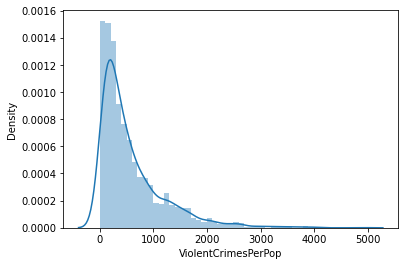

In [8]:
sns.distplot(crimedata['ViolentCrimesPerPop']);

In [9]:
#skewness and kurtosis
print("Skewness: %f" % crimedata['ViolentCrimesPerPop'].skew())
print("Kurtosis: %f" % crimedata['ViolentCrimesPerPop'].kurt())

Skewness: 2.103294
Kurtosis: 5.907320


In [10]:
crimedata['nonViolPerPop'].describe()

count     1900.000000
mean      4942.915568
std       2786.334619
min        116.790000
25%       2913.360000
50%       4479.660000
75%       6267.600000
max      27119.760000
Name: nonViolPerPop, dtype: float64

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



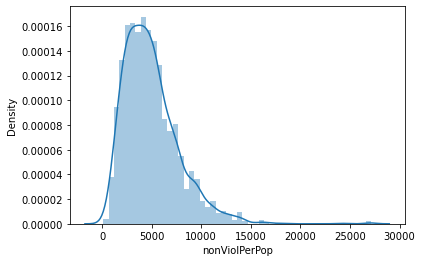

In [11]:
sns.distplot(crimedata['nonViolPerPop']);

In [12]:
#skewness and kurtosis
print("Skewness: %f" % crimedata['nonViolPerPop'].skew())
print("Kurtosis: %f" % crimedata['nonViolPerPop'].kurt())

Skewness: 1.588921
Kurtosis: 5.975694


Relationship with numerical variables

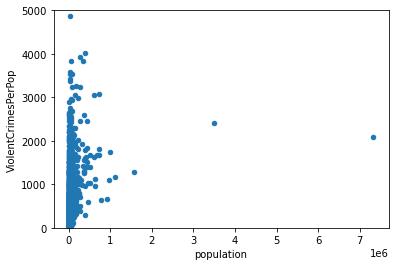

In [13]:
#scatter plot population/ViolentCrimesPerPop
var = 'population'
data = pd.concat([crimedata['ViolentCrimesPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='ViolentCrimesPerPop', ylim=(0,5000));

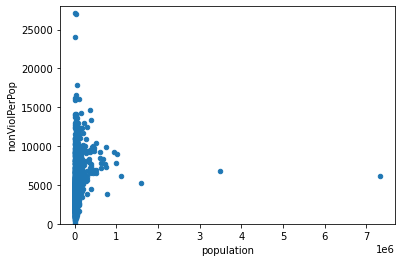

In [14]:
#scatter plot population/nonViolPerPop
var = 'population'
data = pd.concat([crimedata['nonViolPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='nonViolPerPop', ylim=(0,28000));

In [15]:
crimedata['PopDens'].describe()

count     1900.000000
mean      2804.727842
std       2946.183413
min         10.000000
25%       1174.425000
50%       2003.750000
75%       3278.400000
max      44229.900000
Name: PopDens, dtype: float64

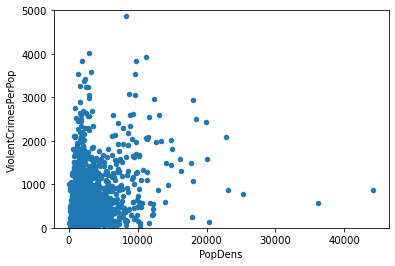

In [16]:
#scatter plot PopDens/ViolentCrimesPerPop
var = 'PopDens'
data = pd.concat([crimedata['ViolentCrimesPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='ViolentCrimesPerPop', ylim=(0,5000));

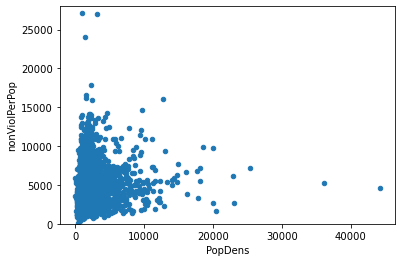

In [17]:
#scatter plot PopDens/nonViolPerPop
var = 'PopDens'
data = pd.concat([crimedata['nonViolPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='nonViolPerPop', ylim=(0,28000));

Relationship with categorical features

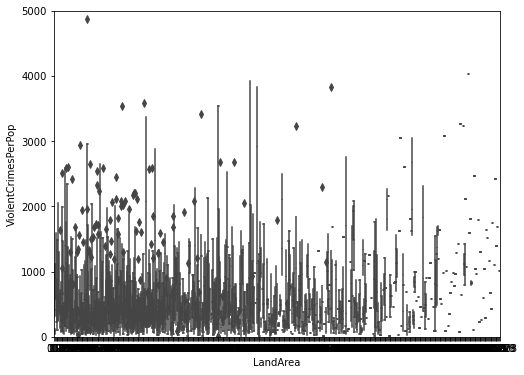

In [18]:
#box plot LandArea/ViolentCrimesPerPop
var = 'LandArea'
data = pd.concat([crimedata['ViolentCrimesPerPop'], crimedata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="ViolentCrimesPerPop", data=data)
fig.axis(ymin=0, ymax=5000);

Correlation matrix

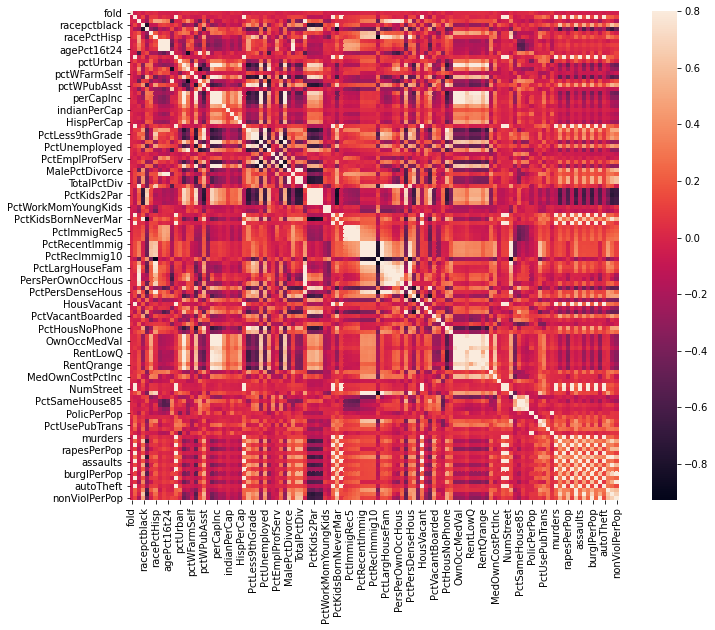

In [19]:
#correlation matrix
corrmat = crimedata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

ViolentCrimesPerPop correlation matrix

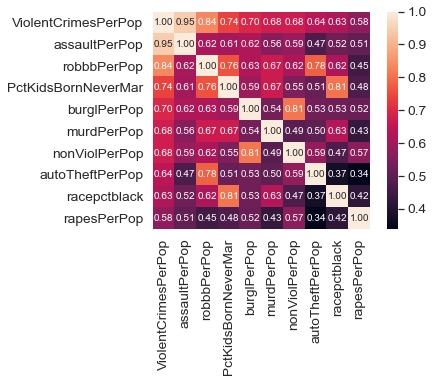

In [20]:
#ViolentCrimesPerPop correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'ViolentCrimesPerPop')['ViolentCrimesPerPop'].index
cm = np.corrcoef(crimedata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

nonViolPerPop correlation matrix

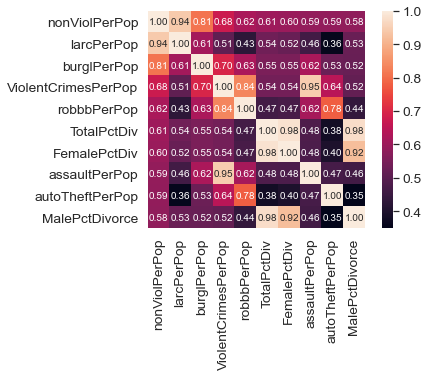

In [21]:
#nonViolPerPop correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'nonViolPerPop')['nonViolPerPop'].index
cm = np.corrcoef(crimedata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Scatter plots between 'ViolentCrimesPerPop' and correlated variables

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



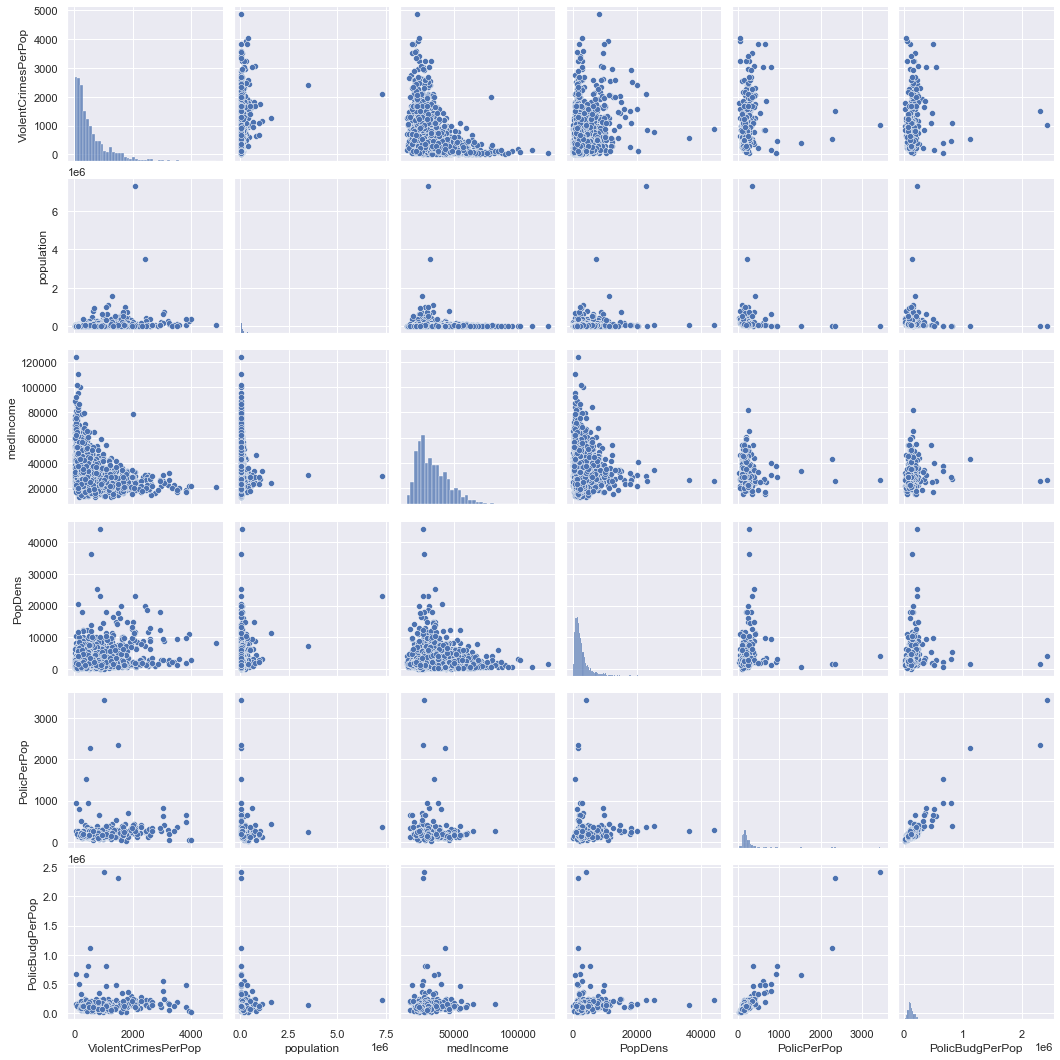

In [22]:
#scatterplot
sns.set()
cols = ['ViolentCrimesPerPop', 'population', 'medIncome','PopDens','PolicPerPop','PolicBudgPerPop']
sns.pairplot(crimedata[cols], size = 2.5)
plt.show();

Scatter plots between 'nonViolPerPop' and correlated variables

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



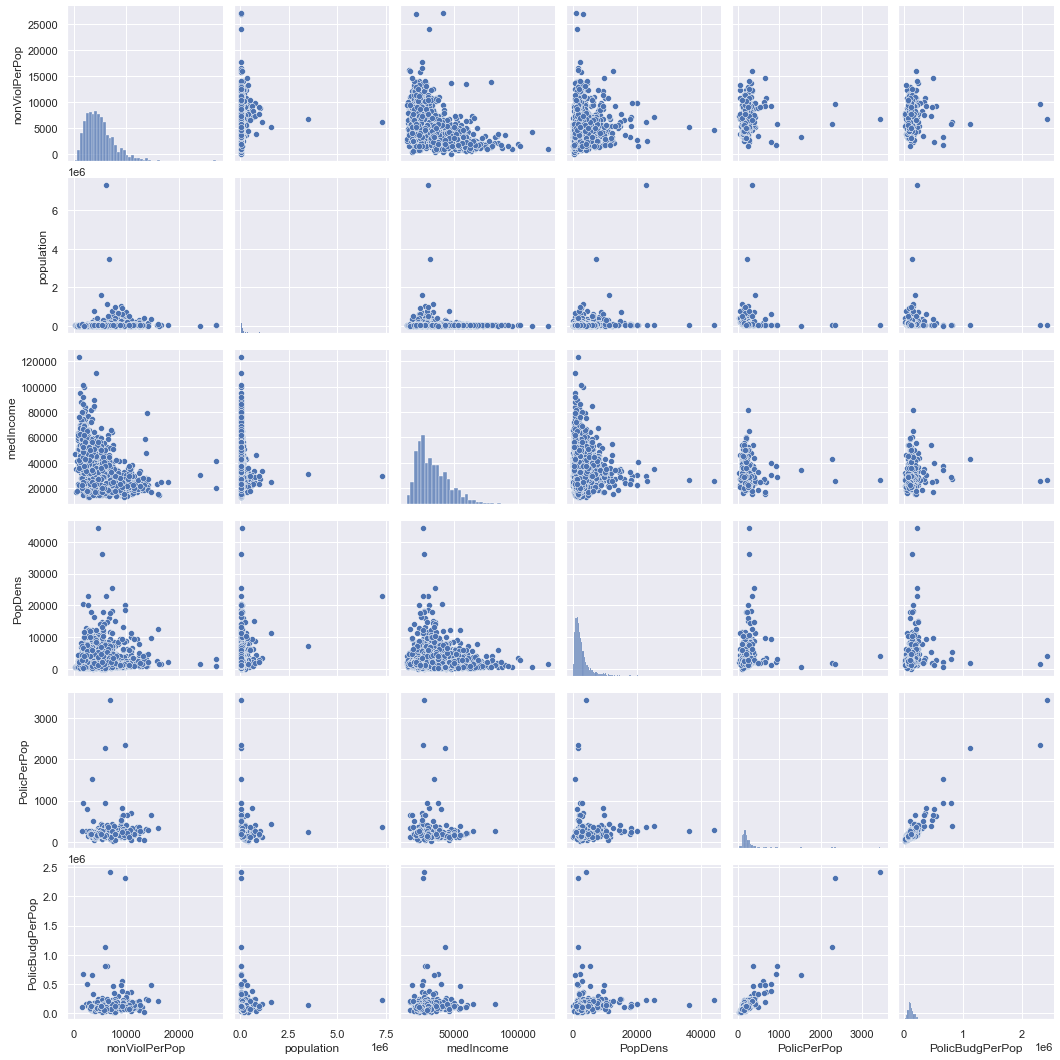

In [23]:
#scatterplot
sns.set()
cols = ['nonViolPerPop', 'population', 'medIncome','PopDens','PolicPerPop','PolicBudgPerPop']
sns.pairplot(crimedata[cols], size = 2.5)
plt.show();

Univariate analysis

In [24]:
#standardizing data
ViolentCrimesPerPop_scaled = StandardScaler().fit_transform(crimedata['ViolentCrimesPerPop'][:,np.newaxis]);
low_range = ViolentCrimesPerPop_scaled[ViolentCrimesPerPop_scaled[:,0].argsort()][:10]
high_range= ViolentCrimesPerPop_scaled[ViolentCrimesPerPop_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.94913034]
 [-0.94723984]
 [-0.9455466 ]
 [-0.94549728]
 [-0.94513562]
 [-0.94485615]
 [-0.94077924]
 [-0.93855995]
 [-0.93851063]
 [-0.93814897]]

outer range (high) of the distribution:
[[4.57159131]
 [4.6532283 ]
 [4.84426805]
 [4.86036201]
 [4.93090255]
 [5.3348626 ]
 [5.34290136]
 [5.49731461]
 [5.6593392 ]
 [7.05744244]]


<ipython-input-24-8c428326bb0d>:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [25]:
#standardizing data
nonViolPerPop_scaled = StandardScaler().fit_transform(crimedata['nonViolPerPop'][:,np.newaxis]);
low_range = nonViolPerPop_scaled[nonViolPerPop_scaled[:,0].argsort()][:10]
high_range= nonViolPerPop_scaled[nonViolPerPop_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.73252562]
 [-1.62328529]
 [-1.61155353]
 [-1.58915621]
 [-1.53187235]
 [-1.52437666]
 [-1.52324225]
 [-1.50481535]
 [-1.49603089]
 [-1.49142866]]

outer range (high) of the distribution:
[[3.32567138]
 [3.49521108]
 [3.9406553 ]
 [4.00245883]
 [4.05335269]
 [4.19486254]
 [4.63688201]
 [6.88305415]
 [7.92211528]
 [7.96124148]]


<ipython-input-25-5f30bb9c233a>:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Normality

The point here is to test 'ViolentCrimesPerPop' & 'nonViolPerPop' in a very lean way. We'll do this paying attention to:

Histogram - Kurtosis and skewness.

Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



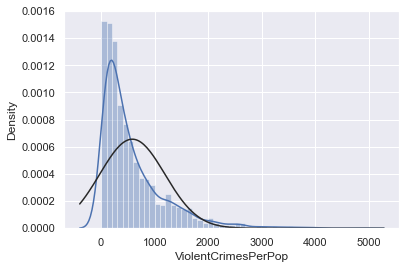

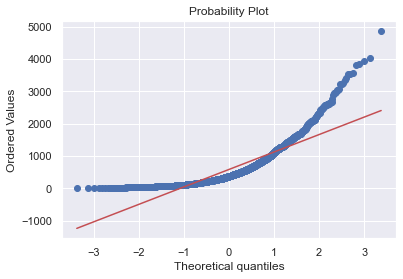

In [26]:
#histogram and normal probability plot
sns.distplot(crimedata['ViolentCrimesPerPop'], fit=norm);
fig = plt.figure()
res = stats.probplot(crimedata['ViolentCrimesPerPop'], plot=plt)

In [27]:
#applying log transformation
crimedata['ViolentCrimesPerPop'] = np.log(crimedata['ViolentCrimesPerPop'])
crimedata['ViolentCrimesPerPop'].describe()

count    1900.000000
mean        5.853324
std         1.091612
min         1.893112
25%         5.107265
50%         5.911650
75%         6.675830
max         8.492298
Name: ViolentCrimesPerPop, dtype: float64

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



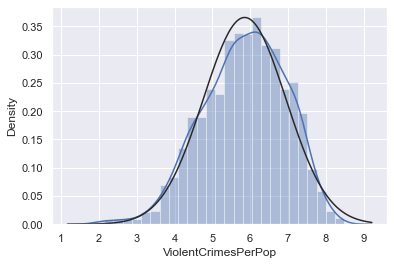

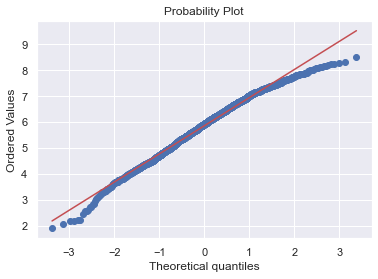

In [28]:
#transformed histogram and normal probability plot
sns.distplot(crimedata['ViolentCrimesPerPop'], fit=norm)
fig = plt.figure()
res = stats.probplot(crimedata['ViolentCrimesPerPop'], plot=plt)

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



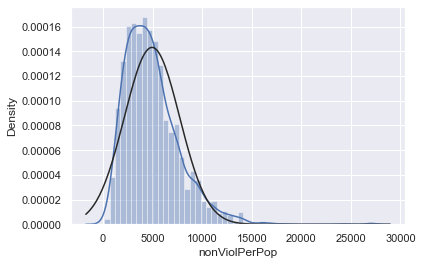

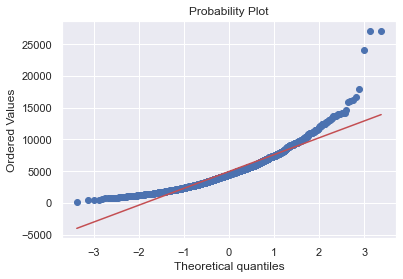

In [29]:
#histogram and normal probability plot
sns.distplot(crimedata['nonViolPerPop'], fit=norm);
fig = plt.figure()
res = stats.probplot(crimedata['nonViolPerPop'], plot=plt)

In [30]:
#applying log transformation
crimedata['nonViolPerPop'] = np.log(crimedata['nonViolPerPop'])
crimedata['nonViolPerPop'].describe()

count    1900.000000
mean        8.350073
std         0.580946
min         4.760377
25%         7.977062
50%         8.407302
75%         8.743149
max        10.208018
Name: nonViolPerPop, dtype: float64

D:\Anaconda\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



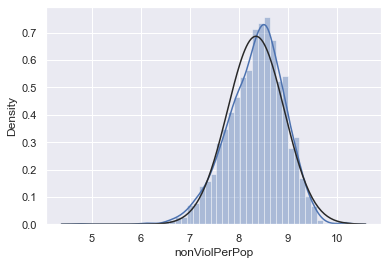

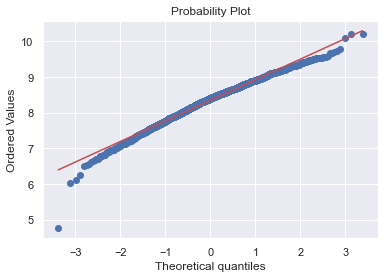

In [31]:
#transformed histogram and normal probability plot
sns.distplot(crimedata['nonViolPerPop'], fit=norm)
fig = plt.figure()
res = stats.probplot(crimedata['nonViolPerPop'], plot=plt)

Plot Map

In [32]:
#group Violent crime and nonViolent crime by state
crimedata_state = crimedata.groupby('state').agg({'ViolentCrimesPerPop':'mean','nonViolPerPop':'mean'})[['ViolentCrimesPerPop','nonViolPerPop']].reset_index()

##Aggregate view of Non-Violent Crimes by State
data1 = dict(type='choropleth',
        colorscale = 'ylgnbu',
        autocolorscale = False,
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['nonViolPerPop'].astype(float),
        colorbar = {'title':'non-Violent Crimes(Per-100K-Pop)'}
        )
layout1 = dict(
        title = 'Aggregate view of non-Violent Crimes Per 100K Population',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor='rgb(0,0,0)'),
             )
    
fig1 = go.Figure(data = [data1],layout = layout1)
iplot(fig1,validate=False)

In [33]:
##Aggregate view of Violent Crimes by state
data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "ylgnbu",
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['ViolentCrimesPerPop'].astype(float),
        colorbar = {'title':'Violent Crimes Per 100K Population'}
        )
layout2 = dict(
        title = 'Aggregate view of Violent Crimes Per 100K Population across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0,0,0)'),
             )
    
fig2 = go.Figure(data = [data2],layout = layout2)
iplot(fig2,validate=False)

In [34]:
## Check if there is multicollinearity between any of the explanatory variables under study
cols = ['HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','PctUnemployed','PctEmploy','murdPerPop','rapesPerPop','robbbPerPop','assaultPerPop','ViolentCrimesPerPop','burglPerPop','larcPerPop','autoTheftPerPop','arsonsPerPop','nonViolPerPop']
crimedata_study = crimedata.filter(cols, axis=1)
corr_crimedata_study = crimedata_study.corr()
iv_corr = corr_crimedata_study.iloc[:-10,:-10]
multicol_limit = 0.3
iv_corr = (iv_corr[abs(iv_corr) > multicol_limit][iv_corr != 1.0]).unstack().to_dict()
iv_multicoll_corr = pd.DataFrame(list(set([(tuple(sorted(key)), iv_corr[key]) for key in iv_corr])), 
        columns=['Independent Variables', 'Correlation Coefficient'])
print (iv_multicoll_corr[iv_multicoll_corr.notnull().all(axis=1)])

                 Independent Variables  Correlation Coefficient
2       (PctHousOwnOcc, PctUnemployed)                -0.394017
3    (PctUnemployed, PctVacantBoarded)                 0.480908
26  (PctVacMore6Mos, PctVacantBoarded)                 0.349288


In [35]:
# Let's find out the outliers in `ViolentCrimesPerPop` response variable and plot those to find cities with highest crime rate in the US
quartile_1, quartile_3 = np.percentile(crimedata['ViolentCrimesPerPop'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
outliers_viol = crimedata.loc[crimedata['ViolentCrimesPerPop']>upper_bound,['communityName','state','ViolentCrimesPerPop']]


## Let's find out the outliers in `nonViolPerPop` response variable and plot those to find cities with highest crime rate in the US
quartile_1, quartile_3 = np.percentile(crimedata['nonViolPerPop'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
outliers_nviol = crimedata.loc[crimedata['nonViolPerPop']>upper_bound,['communityName','state','nonViolPerPop']]

## Remove community Name(s) ending with "city". This helps dataframe(s) merging easier to get lat and lon
outliers_viol['communityName'] = outliers_viol['communityName'].map(lambda result : re.sub(r'city','',result))
outliers_nviol['communityName'] = outliers_nviol['communityName'].map(lambda result : re.sub(r'city','',result))

## read citie.json file to get latitude and longitude details of the cities
file = "cities.json"
with open(file) as city_file:
   dict_city = json.load(city_file)
cities_lat_lon = json_normalize(dict_city)
#print (cities_lat_lon.info())
## Cities with highest  non-violent crime rate
levels = [(0,20),(21,30),(31,40),(41,50),(51,80)]
colors = ['rgb(255,133,27)','rgb(31,120,180)','rgb(178,223,138)','rgb(251,154,153)','rgb(227,26,28)']
plot_data = []
for i in range(len(levels)):
    lim = levels[i]
    nonviolent_crime_cities_sub = nonviolent_crime_cities[lim[0]:lim[1]]
    city_outline = dict(
        type = "scattergeo",
        locationmode = 'USA-states',
        lon = nonviolent_crime_cities_sub['longitude'],
        lat = nonviolent_crime_cities_sub['latitude'],
        text = nonviolent_crime_cities_sub['communityname'] +' '+ nonviolent_crime_cities_sub['nonViolPerPop'].astype(str),
        mode = "markers",
        marker = dict(
        size = nonviolent_crime_cities_sub['nonViolPerPop']/800,
        color = colors[i],
        ),  
    name = '{0} - {1}'.format(lim[0],lim[1])
    )
    layout1 = dict(
        title = 'Cities with highest non-Violent Crime rate',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'), 
    )
    plot_data.append(city_outline)
    
fig1= dict( data=plot_data, layout=layout1)
iplot( fig1, validate=False)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['communityName'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
## Cities with highest violent crime rate
levels = [(0,30),(31,60),(61,90),(91,120),(121,170)]
colors = ['rgb(175,175,50)','rgb(131,120,180)','rgb(78,230,138)','rgb(251,24,153)','rgb(227,126,28)']
cities = []
for i in range(len(levels)):
    lim = levels[i]
    violent_crime_cities_sub = violent_crime_cities[lim[0]:lim[1]]
    city_outline = dict(
        type = "scattergeo",
        locationmode = 'USA-states',
        lon = violent_crime_cities_sub['longitude'],
        lat = violent_crime_cities_sub['latitude'],
        text = violent_crime_cities_sub['communityname'] +' '+ violent_crime_cities_sub['ViolentCrimesPerPop'].astype(str),
        mode = "markers",
        marker = dict(
        size = violent_crime_cities_sub['ViolentCrimesPerPop']/200,
        color = colors[i]
        ),  
    name = '{0} - {1}'.format(lim[0],lim[1])
    )
    layout2 = dict(
        title = 'Cities with highest Violent Crime rate',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
    ) 
    cities.append(city_outline)
    
fig2= dict( data=cities, layout=layout2)
iplot( fig2, validate=False)